<a href="https://colab.research.google.com/github/petedanN/ML-U.S-Car-Pricing-Prediction/blob/main/U_S_Car_Pricing_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Modules**

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore, boxcox
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV

# **Loading and Preprocessing**

In [69]:
df = pd.read_csv('CarPrice.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [70]:
df.shape

(205, 26)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [72]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [73]:
df.duplicated().sum()

0

In [74]:
df.isnull().sum()

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


<Figure size 800x600 with 0 Axes>

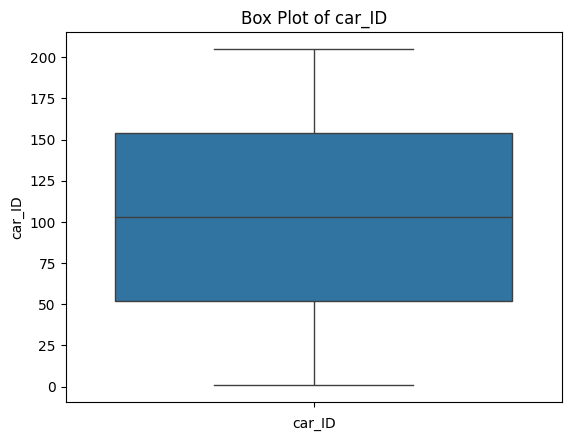

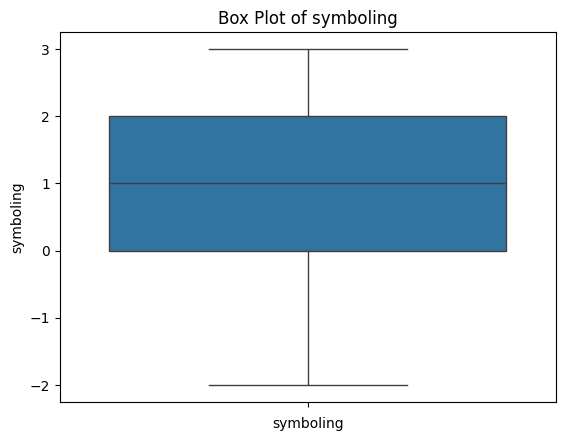

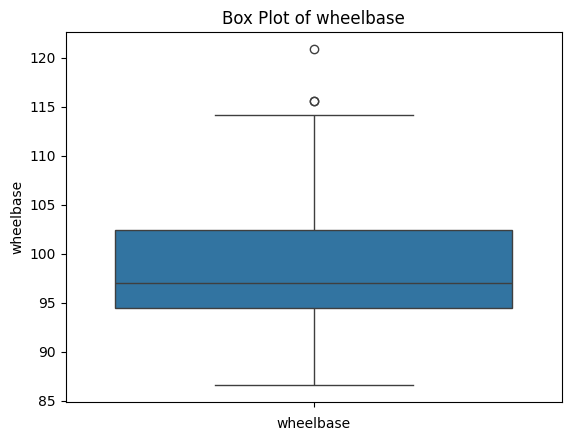

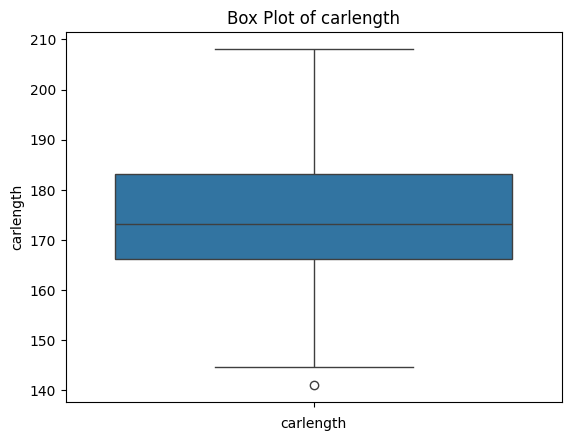

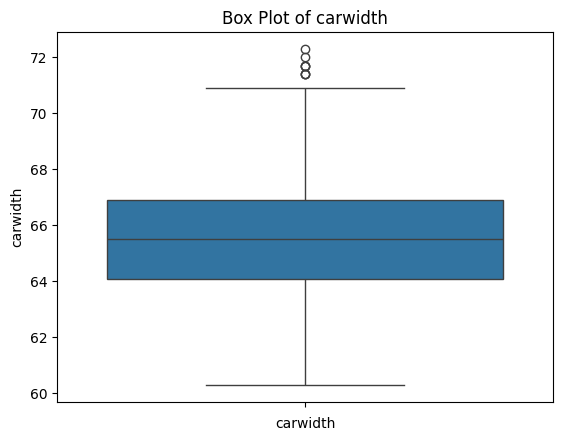

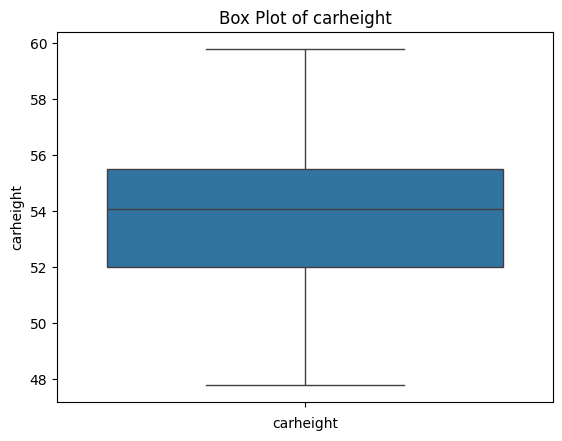

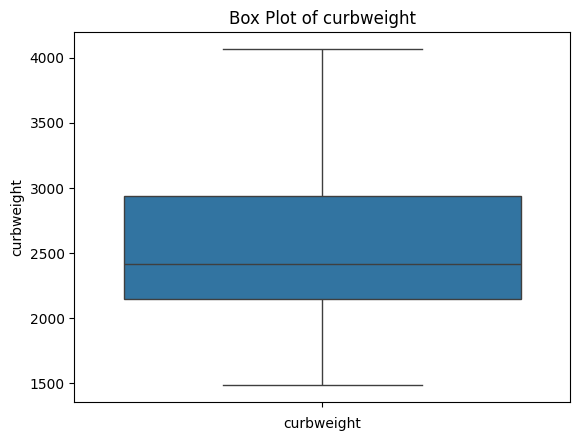

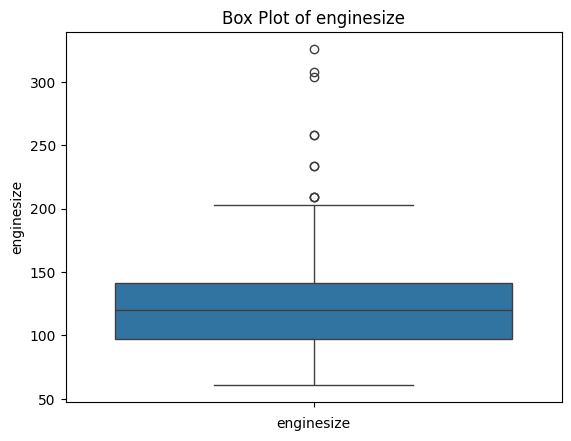

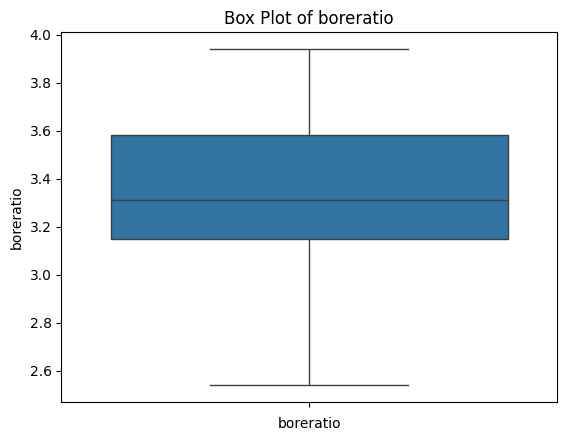

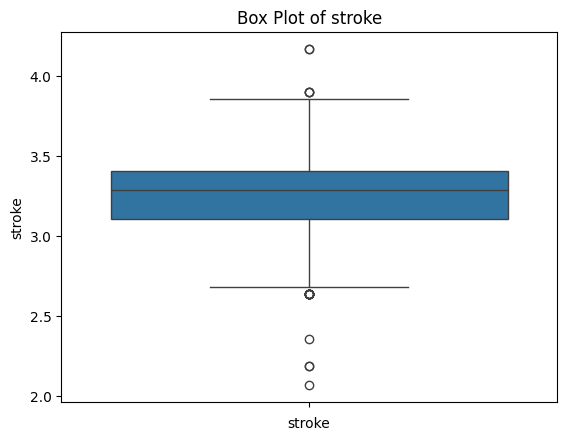

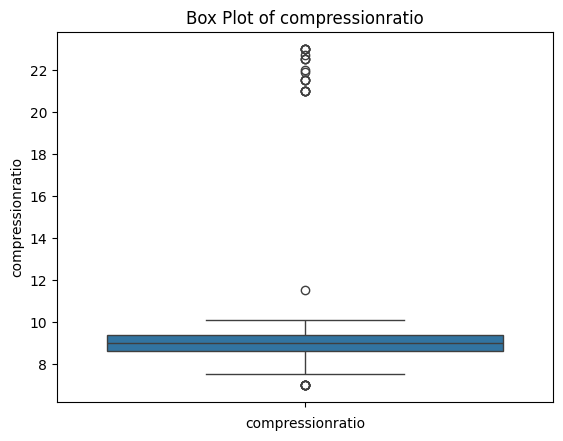

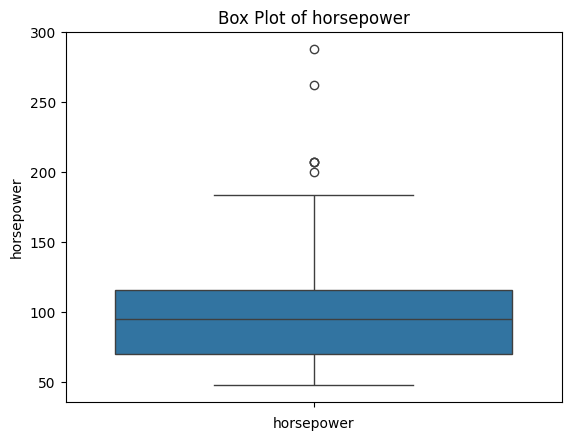

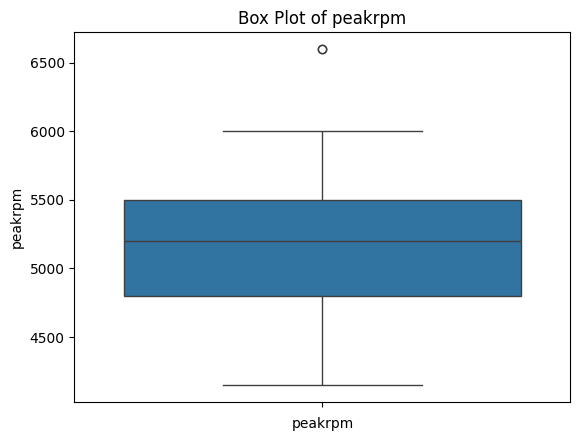

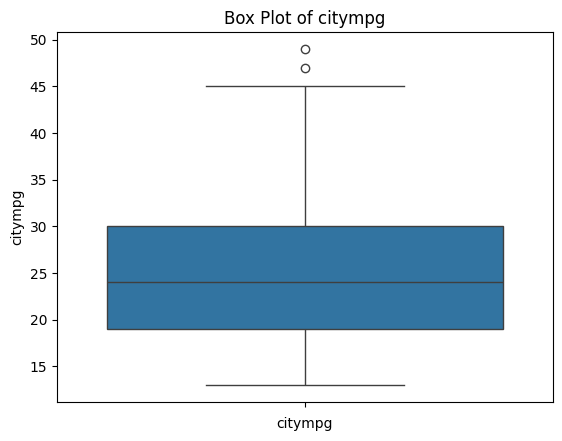

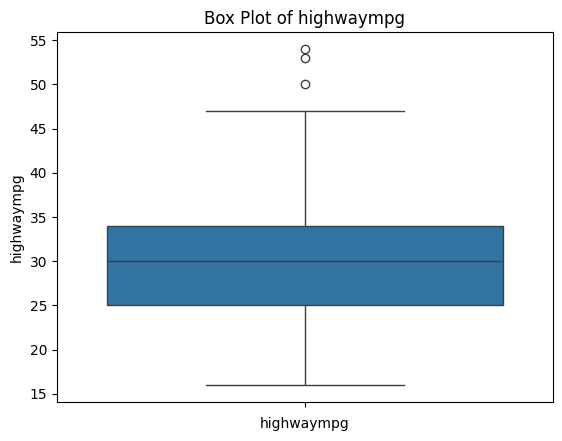

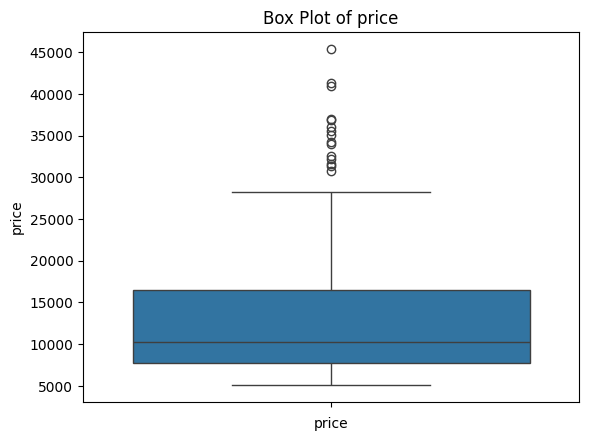

In [75]:
num_columns = df.select_dtypes(include=['int64','float64']).columns.tolist()
plt.figure(figsize=(8, 6))

for column in num_columns:
    plt.figure()
    sns.boxplot(y=df[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

In [76]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df_cleaned = df.copy()


for col in num_columns:
    df_cleaned = remove_outliers(df_cleaned, col)

<Figure size 800x600 with 0 Axes>

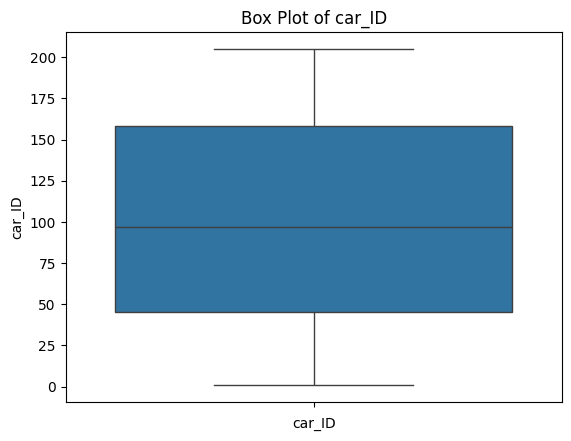

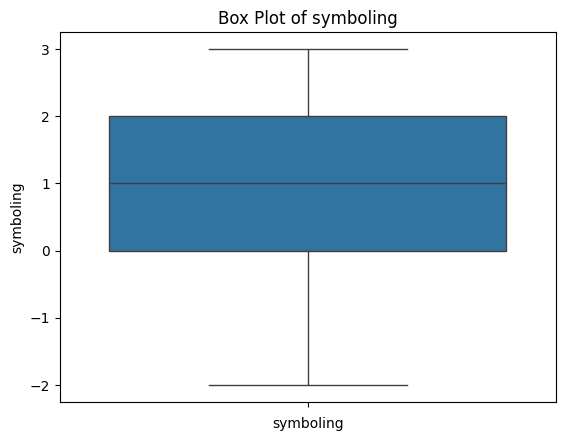

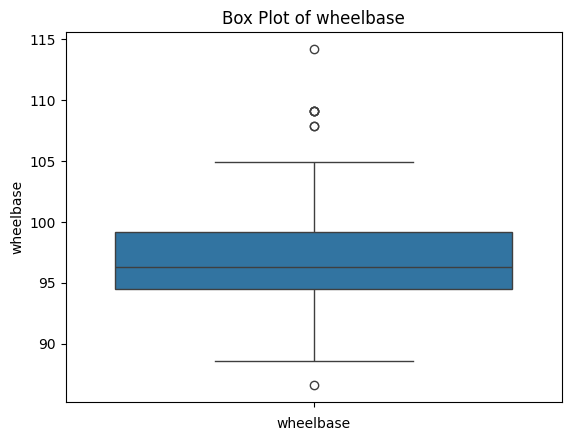

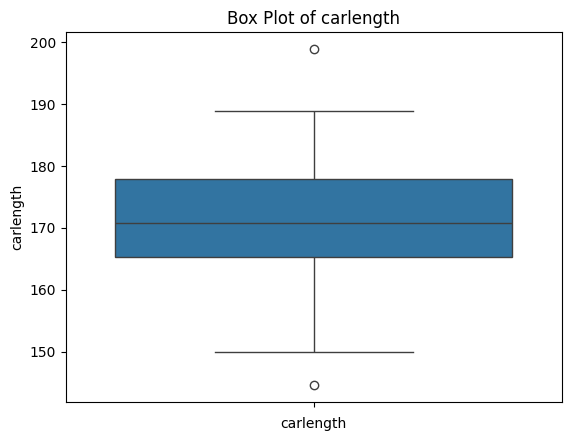

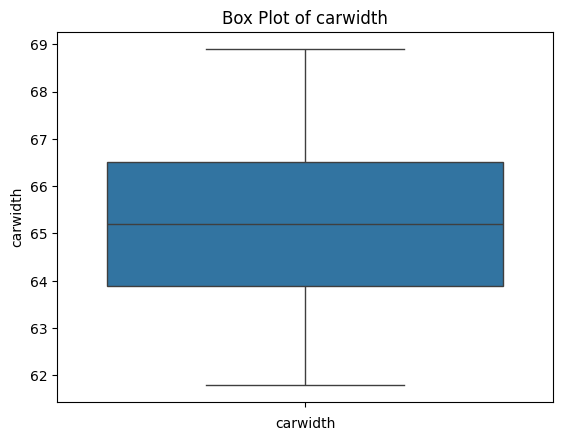

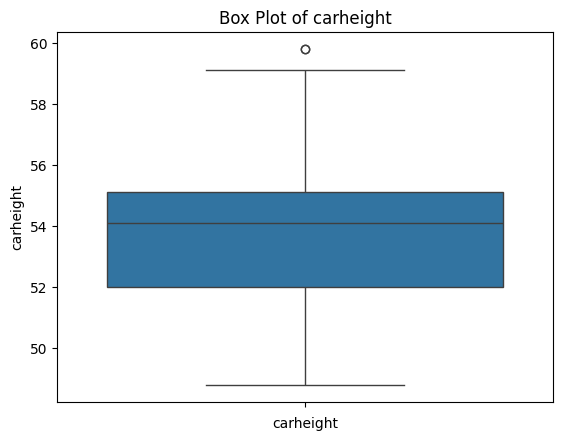

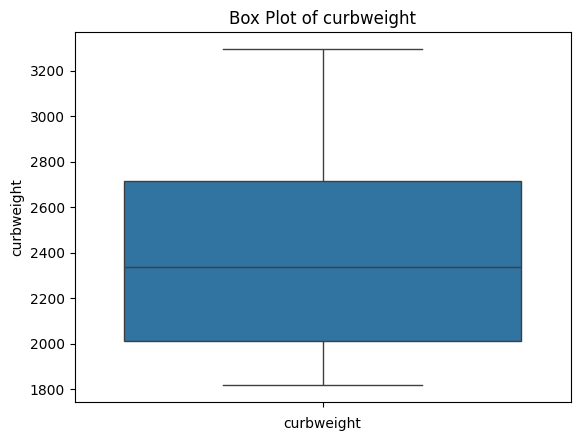

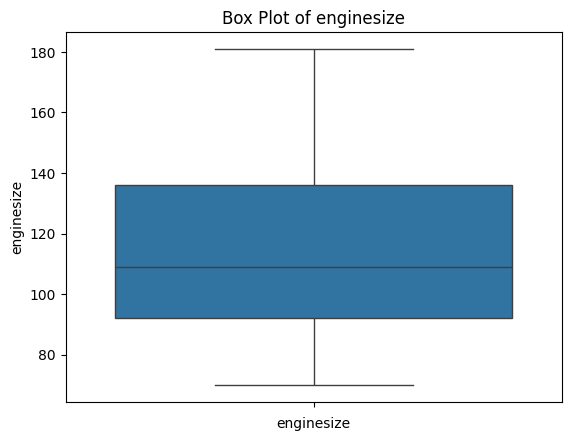

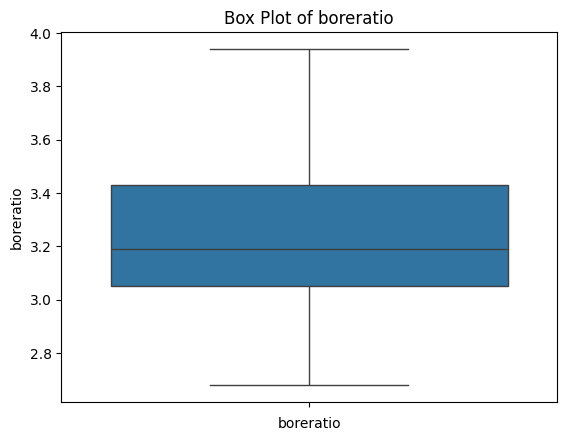

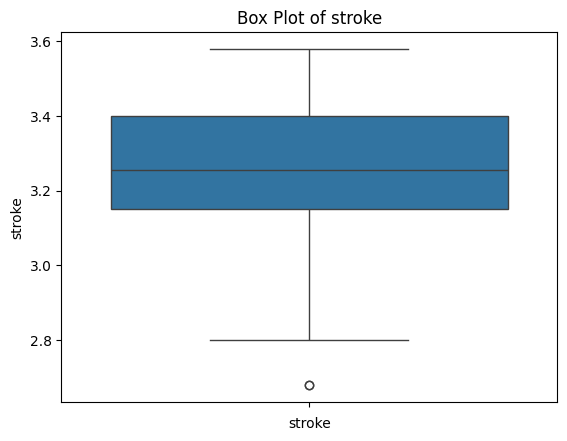

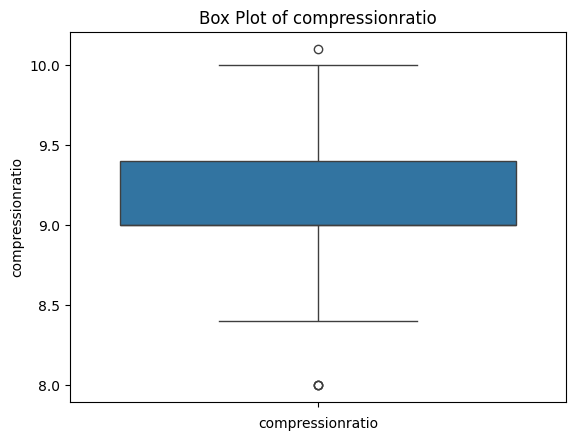

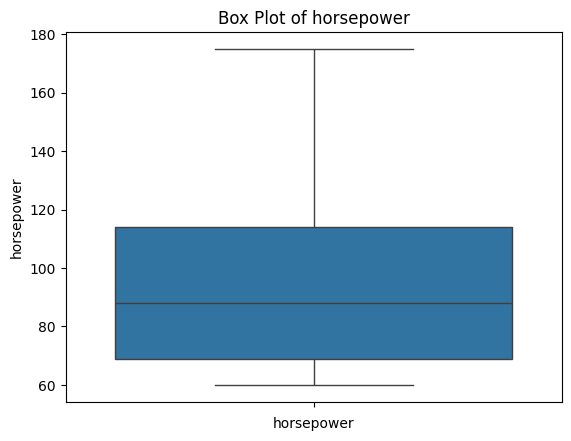

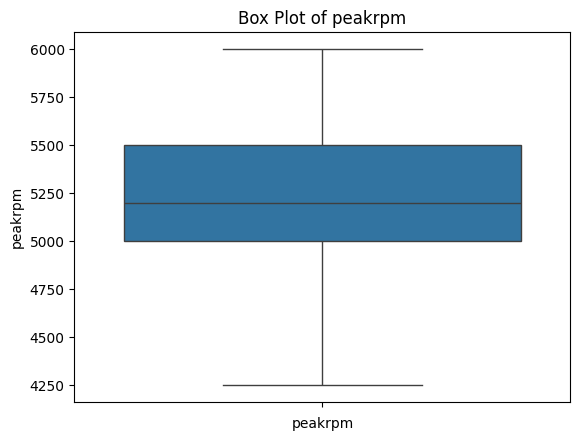

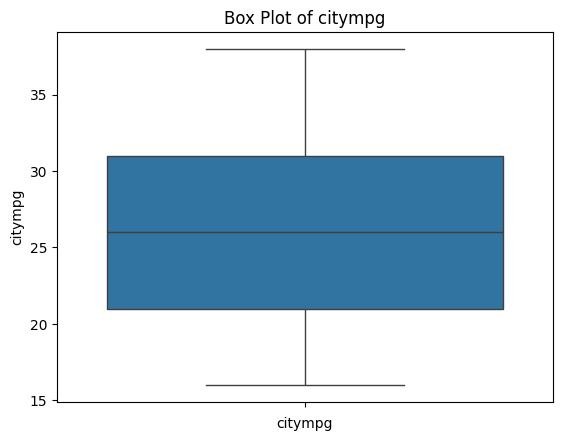

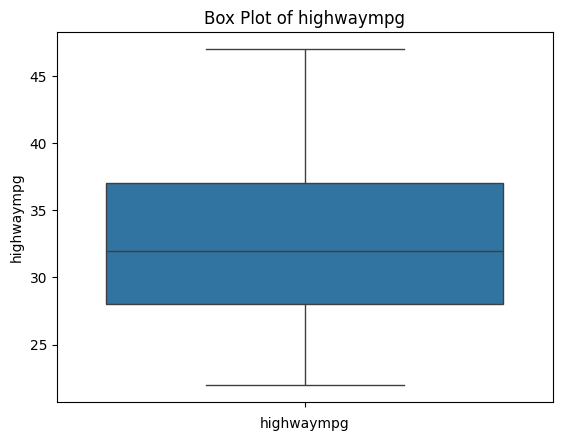

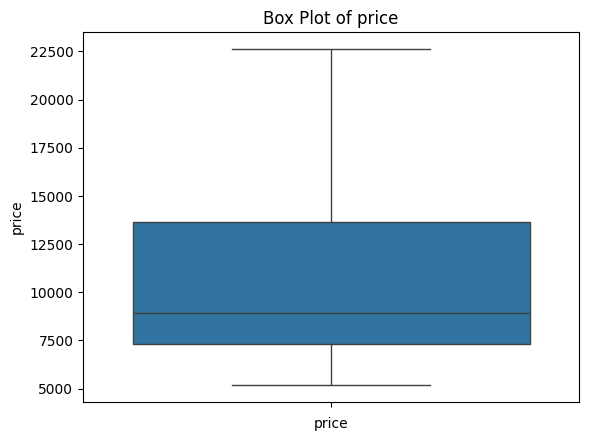

In [77]:
plt.figure(figsize=(8, 6))

for column in num_columns:
    plt.figure()
    sns.boxplot(y=df_cleaned[column])
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()

In [78]:
categorical_columns = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_columns)

In [79]:
X = df.drop('price', axis=1)
y = df['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#**Model Implementation**

In [80]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR()
}

In [81]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Model Evaluation**

In [82]:
results =[]

for name,model in models.items():
  model.fit(X_train,y_train)

  y_pred=model.predict(X_test)


  mse=mean_squared_error(y_test,y_pred)
  mae=mean_absolute_error(y_test,y_pred,)
  r2=r2_score(y_test,y_pred,)


  results.append({
      "Model" : name ,
      "MSE"  : mse,
      "MAE"  : mae,
      "R Square" : r2
  })

results_df = pd.DataFrame(results)
print(results_df)

               Model           MSE          MAE  R Square
0  Linear Regression  1.785074e+08  7036.822888 -1.261189
1      Decision Tree  1.194149e+07  2078.430902  0.848735
2      Random Forest  3.563062e+06  1344.803610  0.954866
3  Gradient Boosting  5.172577e+06  1617.661008  0.934478
4                SVR  8.699545e+07  5707.168361 -0.101989


In [83]:
best_model_name = results_df.loc[results_df['R Square'].idxmax(), 'Model']
best_mse = results_df['MSE'].min()
best_mae = results_df['MAE'].min()

# Display the best performing model
print(f"The best performing model is: {best_model_name}")
print(f"Best R Square: {results_df['R Square'].max()}")
print(f"Best MSE: {best_mse}")
print(f"Best MAE: {best_mae}")

The best performing model is: Random Forest
Best R Square: 0.9548659727284703
Best MSE: 3563061.5913066827
Best MAE: 1344.8036097560976


# **Hyperparameter Tuning**

In [84]:
#Initialize the Random Forest Regressor
rf_model = RandomForestRegressor()


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

y_pred = best_model.predict(X_train)

# Calculate performance metrics
best_r2 = r2_score(y_train, y_pred)
best_mse = mean_squared_error(y_train, y_pred)
best_mae = mean_absolute_error(y_train, y_pred)

print(f"Best R²: {best_r2:.4f}")
print(f"Best MSE: {best_mse:.4f}")
print(f"Best MAE: {best_mae:.4f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best R²: 0.9795
Best MSE: 1222633.2889
Best MAE: 689.6048


# **The Random Forest Regressor is the best-performing model before and after hyperparameter tuning.**
# **Random Forest has the highest R² and the lowest errors (MSE & MAE)**
# **After Hyper Parameter Tuning the Performance has increased also.**